In [1]:
import pandas as pd

df = pd.read_csv("../data/spotify_data.csv")

In [6]:
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [16]:
df.dtypes

Unnamed: 0            int64
artist_name          object
track_name           object
track_id             object
popularity            int64
year                  int64
genre                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

In [8]:
df.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [10]:
df.isna().sum()

Unnamed: 0           0
artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

In [5]:
df.describe().apply(lambda s: s.apply(lambda f: "%.2f" % f))

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00
mean,659061.32,18.38,2011.96,0.54,0.64,5.29,-8.98,0.63,0.09,0.32,0.25,0.22,0.46,121.38,249561.78,3.89
std,428549.15,15.89,6.80,0.18,0.27,3.56,5.68,0.48,0.13,0.35,0.37,0.20,0.27,29.78,149426.16,0.47
min,0.00,0.00,2000.00,0.00,0.00,0.00,-58.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2073.00,0.00
25%,289940.75,5.00,2006.00,0.41,0.45,2.00,-10.83,0.00,0.04,0.01,0.00,0.10,0.23,98.80,181091.00,4.00
50%,579881.50,15.00,2012.00,0.55,0.69,5.00,-7.45,1.00,0.05,0.15,0.00,0.13,0.44,121.93,225744.00,4.00
75%,1031689.25,29.00,2018.00,0.68,0.87,8.00,-5.28,1.00,0.09,0.64,0.61,0.29,0.67,139.90,286913.50,4.00
max,1473395.00,100.00,2023.00,0.99,1.00,11.00,6.17,1.00,0.97,1.00,1.00,1.00,1.00,249.99,6000495.00,5.00


In [63]:
# check number of categories for (potential) categorical features
df[["artist_name", "genre", "key", "mode"]].nunique()

artist_name    64158
genre             82
key               12
mode               2
dtype: int64

<Axes: xlabel='count', ylabel='Proportion'>

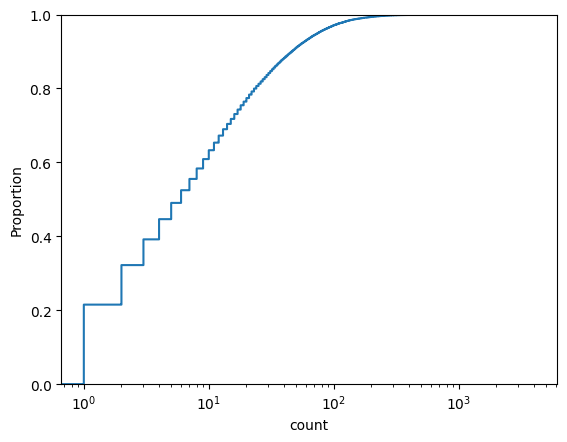

In [13]:
# distribution of the number of songs per artist
import seaborn as sns
sns.ecdfplot(df["artist_name"].value_counts(), log_scale=True)

C:\Users\DominikJain\miniconda3\envs\pop\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DominikJain\miniconda3\envs\pop\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\DominikJain\miniconda3\envs\pop\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


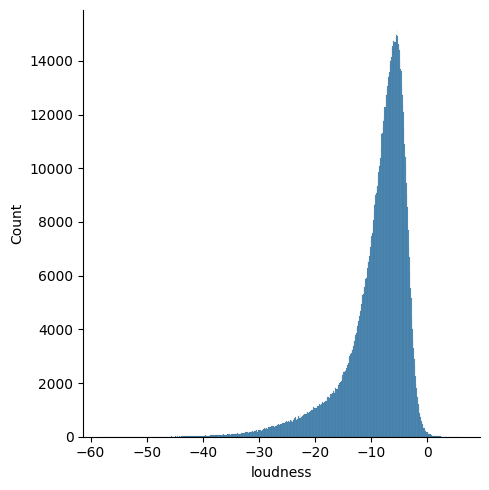

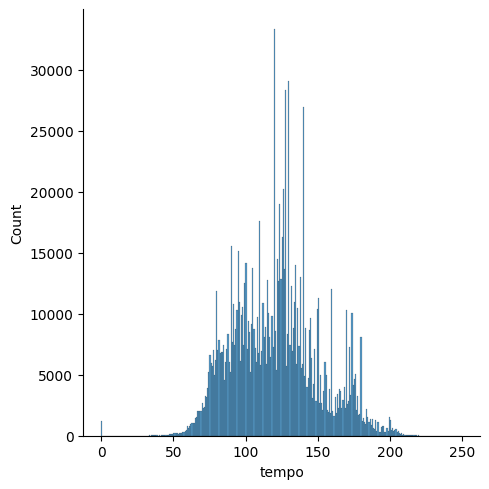

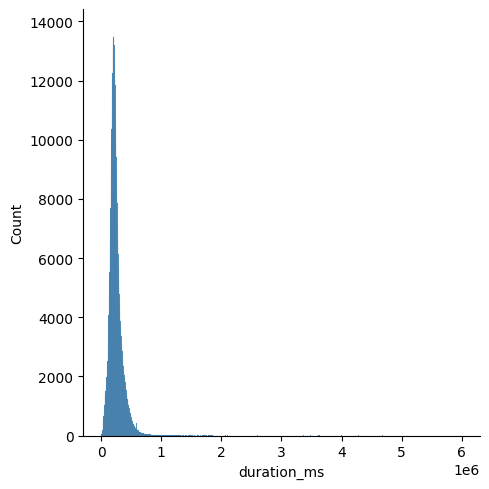

In [19]:
# inspect distributions of unnormalised numeric features to determine reasonable normalisations
for col in ["loudness", "tempo", "duration_ms"]:
    sns.displot(df[col])